In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, LSTM, Dense

# Assuming you have 'text' as your dataset

# Data preprocessing
vocab = sorted(set(text))
char_to_idx = {char: idx for idx, char in enumerate(vocab)}
idx_to_char = np.array(vocab)
text_as_int = np.array([char_to_idx[c] for c in text])

# Create training examples and targets
seq_length = 100
examples_per_epoch = len(text)//(seq_length+1)
char_dataset = tf.data.Dataset.from_tensor_slices(text_as_int)
sequences = char_dataset.batch(seq_length+1, drop_remainder=True)

def split_input_target(chunk):
    input_text = chunk[:-1]
    target_text = chunk[1:]
    return input_text, target_text

dataset = sequences.map(split_input_target)

# Build the model
model = Sequential([
    Embedding(len(vocab), 64, input_length=seq_length),
    Conv1D(filters=128, kernel_size=5, activation='relu', padding='same'),
    MaxPooling1D(pool_size=2),
    LSTM(256, return_sequences=True),
    LSTM(256),
    Dense(len(vocab), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')

# Train the model
model.fit(dataset, epochs=20)

# Text generation function
def generate_text(model, start_string, num_generate=1000):
    input_eval = [char_to_idx[s] for s in start_string]
    input_eval = tf.expand_dims(input_eval, 0)
    text_generated = []
    model.reset_states()
    for i in range(num_generate):
        predictions = model(input_eval)
        predictions = tf.squeeze(predictions, 0)
        predicted_id = tf.random.categorical(predictions, num_samples=1)[-1,0].numpy()
        input_eval = tf.expand_dims([predicted_id], 0)
        text_generated.append(idx_to_char[predicted_id])
    return (start_string + ''.join(text_generated))

# Generate text
generated_text = generate_text(model, start_string="Naan Mudhalvan")
print(generated_text)


NameError: name 'text' is not defined

In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Define the CNN architecture
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)


Epoch 1/5
938/938 [==============================] - 50s 53ms/step - loss: 0.1867 - accuracy: 0.9417 - val_loss: 0.0553 - val_accuracy: 0.9828
Epoch 2/5
938/938 [==============================] - 49s 52ms/step - loss: 0.0526 - accuracy: 0.9836 - val_loss: 0.0536 - val_accuracy: 0.9827
Epoch 3/5
938/938 [==============================] - 50s 53ms/step - loss: 0.0363 - accuracy: 0.9885 - val_loss: 0.0368 - val_accuracy: 0.9891
Epoch 4/5
938/938 [==============================] - 53s 57ms/step - loss: 0.0282 - accuracy: 0.9912 - val_loss: 0.0335 - val_accuracy: 0.9899
Epoch 5/5
313/313 [==============================] - 3s 8ms/step - loss: 0.0228 - accuracy: 0.9925
Test accuracy: 0.9925000071525574


In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Sample text data
text = "Hello, how are you? I am doing great!"

# Create character-level vocabulary
vocab = sorted(set(text))
char_to_idx = {char: idx for idx, char in enumerate(vocab)}
idx_to_char = np.array(vocab)
text_as_int = np.array([char_to_idx[c] for c in text])

# Create training examples and targets
seq_length = 10
examples_per_epoch = len(text)//seq_length
char_dataset = tf.data.Dataset.from_tensor_slices(text_as_int)
sequences = char_dataset.batch(seq_length+1, drop_remainder=True)

def split_input_target(chunk):
    input_text = chunk[:-1]
    target_text = chunk[1:]
    return input_text, target_text

dataset = sequences.map(split_input_target)

# Build the RNN model
model = Sequential([
    LSTM(128, input_shape=(seq_length, len(vocab)), return_sequences=True),
    LSTM(128),
    Dense(len(vocab), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')

# Train the model
model.fit(dataset, epochs=20)

# Text generation function
def generate_text(model, start_string, num_generate=100):
    input_eval = [char_to_idx[s] for s in start_string]
    input_eval = tf.expand_dims(input_eval, 0)
    text_generated = []
    model.reset_states()
    for i in range(num_generate):
        predictions = model(input_eval)
        predictions = tf.squeeze(predictions, 0)
        predicted_id = tf.random.categorical(predictions, num_samples=1)[-1,0].numpy()
        input_eval = tf.expand_dims([predicted_id], 0)
        text_generated.append(idx_to_char[predicted_id])
    return (start_string + ''.join(text_generated))

# Generate text
generated_text = generate_text(model, start_string="Hello, how", num_generate=100)
print(generated_text)


Epoch 1/20


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 235, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_2' (type Sequential).
    
    Input 0 of layer "lstm" is incompatible with the layer: expected ndim=3, found ndim=1. Full shape received: (10,)
    
    Call arguments received by layer 'sequential_2' (type Sequential):
      • inputs=tf.Tensor(shape=(10,), dtype=int64)
      • training=True
      • mask=None


170498071/170498071 [==============================] - 4s 0us/step
Epoch 1/10
1563/1563 [==============================] - 69s 43ms/step - loss: 1.5053 - accuracy: 0.4526 - val_loss: 1.2052 - val_accuracy: 0.5755
Epoch 2/10
1563/1563 [==============================] - 69s 44ms/step - loss: 1.1469 - accuracy: 0.5927 - val_loss: 1.0778 - val_accuracy: 0.6160
Epoch 3/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.9904 - accuracy: 0.6517 - val_loss: 0.9509 - val_accuracy: 0.6709
Epoch 4/10
1563/1563 [==============================] - 65s 41ms/step - loss: 0.8895 - accuracy: 0.6872 - val_loss: 0.9141 - val_accuracy: 0.6834
Epoch 5/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.8142 - accuracy: 0.7145 - val_loss: 0.9139 - val_accuracy: 0.6856
Epoch 6/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.7551 - accuracy: 0.7350 - val_loss: 0.8437 - val_accuracy: 0.7115
Epoch 7/10
1563/1563 [==============================] - 6

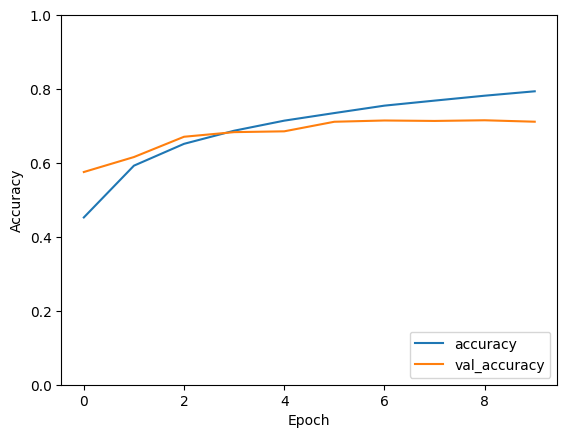

In [5]:
# Import TensorFlow and libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Load and preprocess the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

# Define the CNN architecture
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()
